In [46]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
#from keras.layers.normalization import BatchNormalization
import h5py
%matplotlib inline

In [47]:
# 自分で設定するパラメータ

# バッチサイズ
batch_size = 2000

# エポック数
epochs = 100

In [48]:
# データ抽出
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# one-hot-label に変換
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [49]:
# モデルの構築
model = Sequential()

# 最初の隠れ層(入力784 -> 出力256)
model.add(Dense(256, activation="relu",input_shape=(784,)))
model.add(Dropout(0.1))

# 2つ目の隠れ層(256 -> 出力128)
## 隠れ層は以下の2行をコピペすることで追加できます
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

# 3つ目の隠れ層(128 -> 出力32)
## 隠れ層は以下の2行をコピペすることで追加できます
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))

# 出力層(入力32 -> 出力10)
model.add(Dense(10, activation='softmax'))

# モデル概要表示
model.summary()

# モデルのコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

# フィッティング(学習)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# スコアの計算・表示
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/home/vscode/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,314 (930.91 KB)

 Trainable params: 238,314 (930.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1246 - loss: 2.3206 - val_accuracy: 0.2063 - val_loss: 2.2212
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1864 - loss: 2.2186 - val_accuracy: 0.3415 - val_loss: 2.1256
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2760 - loss: 2.1304 - val_accuracy: 0.4924 - val_loss: 2.0170
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3748 - loss: 2.0339 - val_accuracy: 0.6163 - val_loss: 1.8919
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4609 - loss: 1.9172 - val_accuracy: 0.6877 - val_loss: 1.7487
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5235 - loss: 1.7884 - val_accuracy: 0.7249 - val_loss: 1.5916
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5743 - loss: 1.6458 - val_accuracy: 0.7470 - val_loss: 1.4286
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6014 - loss: 1.5093 - val_accuracy: 0.

In [50]:
model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.9184 - loss: 0.2763


[0.2374449223279953, 0.9316999912261963]

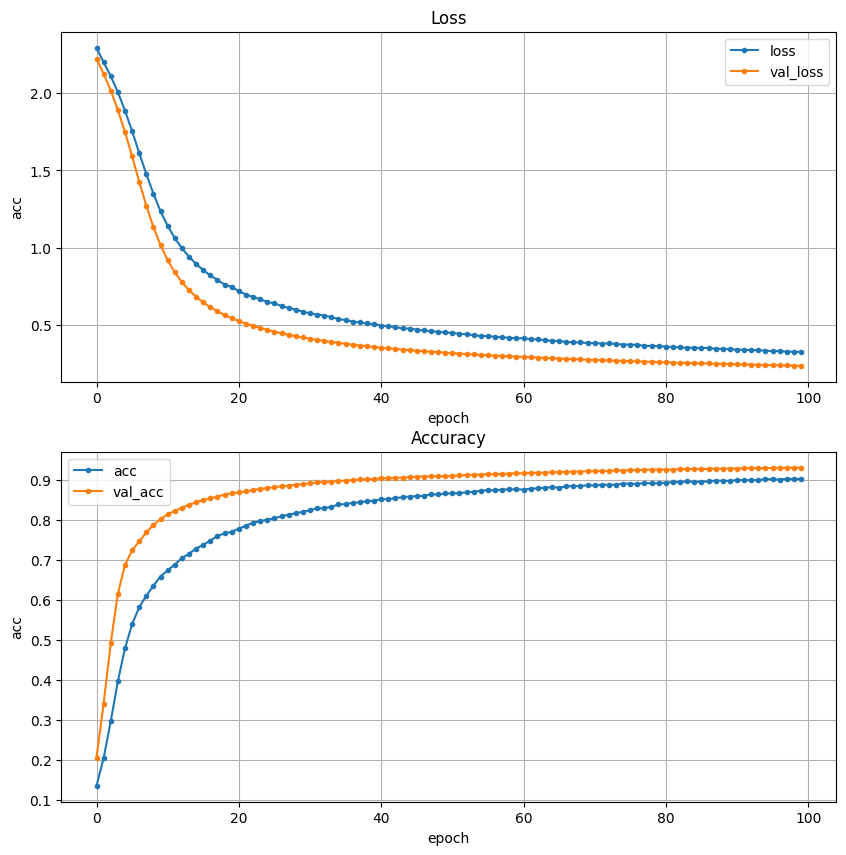

In [51]:
# 学習の様子をプロット

loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Loss')
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [63]:
from keras_visualizer import visualizer

# モデルの概要図をファイル出力
visualizer(model, file_format='png', settings={'MAX_NEURONS': 15})

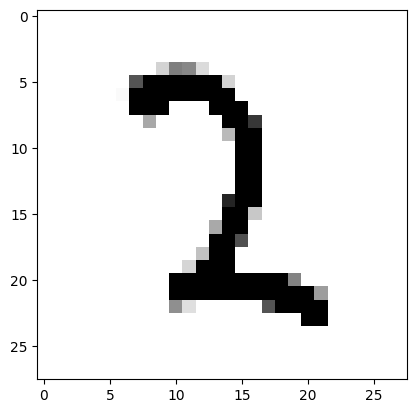

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted digit: 2


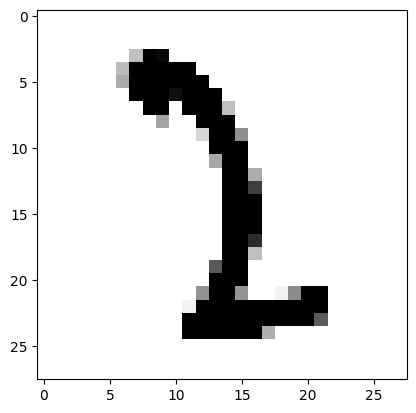

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted digit: 3


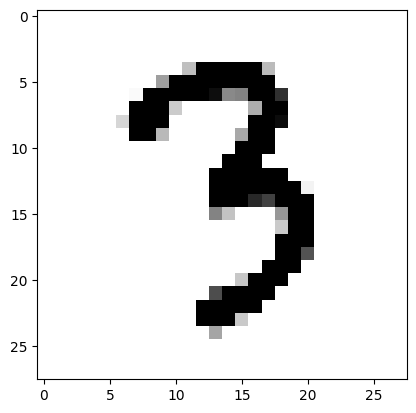

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted digit: 3


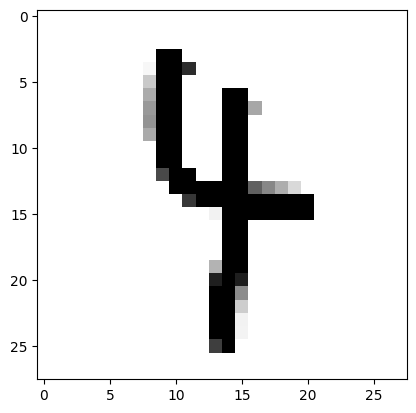

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted digit: 9


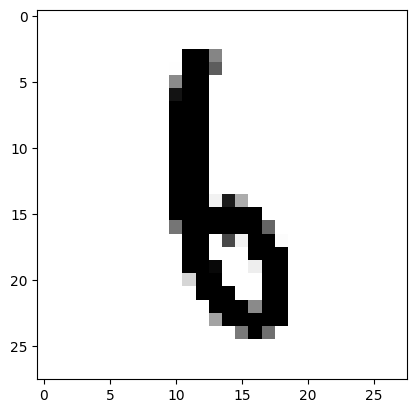

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted digit: 6


In [59]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# モデルのデータ形状
# model_input_shape = model.input_shape
# print(f'Model expects input shape: {model_input_shape}')

for path in ['input_2a-2.png', 'input_2b-2.png', 'input_3a-2.png', 'input_4a-2.png', 'input_6a-2.png']:
  # 画像の読み込みと前処理
  image_path = path  # 画像のパスを指定
  image = load_img(image_path, target_size=(28, 28), color_mode='grayscale')  # MNISTの画像サイズと同じ28x28にリサイズ
  plt.imshow(image, cmap='gray')
  plt.show()
  image = img_to_array(image)
  image = image.reshape(1, 784)  # モデルの入力形式に合わせる
  image = image.astype('float32')
  image = 255 - image  # 色反転
  image /= 255.0  # 正規化

  # 画像の数字を予測
  predictions = model.predict(image)
  digit = np.argmax(predictions)

  # 予測結果の表示
  print(f'Predicted digit: {digit}')